In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/omarEssam-11/omarEssam-11/refs/heads/main/heart_attack_prediction_dataset%20(1).csv')
pd.set_option('display.max_columns', None)
df.head(10)

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   
5    ZOO7941   54  Female          297         172/86          48         1   
6    WYV0966   90    Male          358         102/73          84         0   
7    XXM0972   84    Male          220         131/68         107         0   
8    XCQ5937   20    Male          145        144/105          68         1   
9    FTJ5456   43  Female          248         160/70          55         0   

   Family History  Smoking  Obesity  Alcohol Consumption  \
0               0        1        0                    0   
1               1        1        1                    1   
2               0        0        0                    0   
3               1        1        0                    1   
4               1        1        1                    0   
5               1        1        0                    1   
6               0        1        0                    1   
7               0        1        1                    1   
8               0        1        1                    0   
9               1        1        1                    1   

   Exercise Hours Per Week       Diet  Previous Heart Problems  \
0                 4.168189    Average                        0   
1                 1.813242  Unhealthy                        1   
2                 2.078353    Healthy                        1   
3                 9.828130    Average                        1   
4                 5.804299  Unhealthy                        1   
5                 0.625008  Unhealthy                        1   
6                 4.098177    Healthy                        0   
7                 3.427929    Average                        0   
8                16.868302    Average                        0   
9                 0.194515  Unhealthy                        0   

   Medication Use  Stress Level  Sedentary Hours Per Day  Income        BMI  \
0               0             9                 6.615001  261404  31.251233   
1               0             1                 4.963459  285768  27.194973   
2               1             9                 9.463426  235282  28.176571   
3               0             9                 7.648981  125640  36.464704   
4               0             6                 1.514821  160555  21.809144   
5               1             2                 7.798752  241339  20.146840   
6               0             7                 0.627356  190450  28.885811   
7               1             4                10.543780  122093  22.221862   
8               0             5                11.348787   25086  35.809901   
9               0             4                 4.055115  209703  22.558917   

   Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
0            286                                0                    6   
1            235                                1                    7   
2            587                                4                    4   
3            378                                3                    4   
4            231                                1                    5   
5            795                                5                   10   
6            284                                4                   10   
7            370                                6                    7   
8            790                                7                    4   
9            232                                7                    7   

     Country      Continent           Hemisphere  Heart Att

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
ctg_data = df[['Diet','Continent','Hemisphere']]


In [ ]:
df.drop(['Patient ID', 'Hemisphere', 'Continent'], axis=1, inplace=True)

In [ ]:
df.isna().sum()

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Heart Attack Risk                  0
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8758    False
8759    False
8760    False
8761    False
8762    False
Length: 8763, dtype: bool

In [ ]:
numerical_values = df.describe().columns.to_list()
categorical_values = list(set(df.columns) - set(numerical_values))

In [ ]:
corr_matrix = df[numerical_values].corr()
corr_matrix

Age  Cholesterol  Heart Rate  Diabetes  \
Age                              1.000000    -0.009107   -0.003844 -0.014105   
Cholesterol                     -0.009107     1.000000    0.000315 -0.013428   
Heart Rate                      -0.003844     0.000315    1.000000  0.006764   
Diabetes                        -0.014105    -0.013428    0.006764  1.000000   
Family History                   0.008353    -0.021608   -0.013470 -0.013844   
Smoking                          0.394891     0.016342   -0.012331  0.000527   
Obesity                         -0.008140    -0.014843    0.012725  0.012866   
Alcohol Consumption             -0.006666    -0.007261    0.003459  0.005551   
Exercise Hours Per Week          0.001206     0.021517    0.008276 -0.007014   
Previous Heart Problems          0.000868    -0.006070   -0.004956  0.000867   
Medication Use                   0.000980    -0.000905    0.009244 -0.002656   
Stress Level                     0.018307    -0.024487   -0.004547  0.006719   
Sedentary Hours Per Day          0.017280     0.018914   -0.010232  0.004705   
Income                          -0.001733     0.000007    0.004873 -0.000759   
BMI                             -0.002612     0.017292    0.005299 -0.002852   
Triglycerides                    0.003415    -0.005454    0.012244  0.010431   
Physical Activity Days Per Week  0.001384     0.016056    0.000834 -0.002411   
Sleep Hours Per Day             -0.002185     0.004456    0.001811 -0.012457   
Heart Attack Risk                0.006403     0.019340   -0.004251  0.017225   

                                 Family History   Smoking   Obesity  \
Age                                    0.008353  0.394891 -0.008140   
Cholesterol                           -0.021608  0.016342 -0.014843   
Heart Rate                            -0.013470 -0.012331  0.012725   
Diabetes                              -0.013844  0.000527  0.012866   
Family History                         1.000000  0.011748 -0.001444   
Smoking                                0.011748  1.000000  0.003969   
Obesity                               -0.001444  0.003969  1.000000   
Alcohol Consumption                    0.012701  0.012754 -0.024195   
Exercise Hours Per Week               -0.006378 -0.000150  0.002099   
Previous Heart Problems               -0.004568 -0.000574  0.005159   
Medication Use                         0.000981 -0.010877 -0.006267   
Stress Level                           0.015637 -0.001757  0.010626   
Sedentary Hours Per Day                0.002561  0.015311 -0.001333   
Income                                -0.000401  0.003096 -0.003870   
BMI                                   -0.011492  0.007670 -0.006058   
Triglycerides                         -0.001904  0.004650  0.001467   
Physical Activity Days Per Week        0.009561 -0.006465  0.005337   
Sleep Hours Per Day                   -0.011199 -0.005424 -0.005314   
Heart Attack Risk                     -0.001652 -0.004051 -0.013318   

                                 Alcohol Consumption  Exercise Hours Per Week  \
Age                                        -0.006666                 0.001206   
Cholesterol                                -0.007261                 0.021517   
Heart Rate                                  0.003459                 0.008276   
Diabetes                                    0.005551                -0.007014   
Family History                              0.012701                -0.006378   
Smoking                                     0.012754                -0.000150   
Obesity                                    -0.024195                 0.002099   
Alcohol Consumption                         1.000000                -0.008514   
Exercise Hours Per Week                    -0.008514                 1.000000   
Previous Heart Problems                     0.010395                 0.005253   
Medication Use                              0.003339                -0.007119   
Stress Level                               -

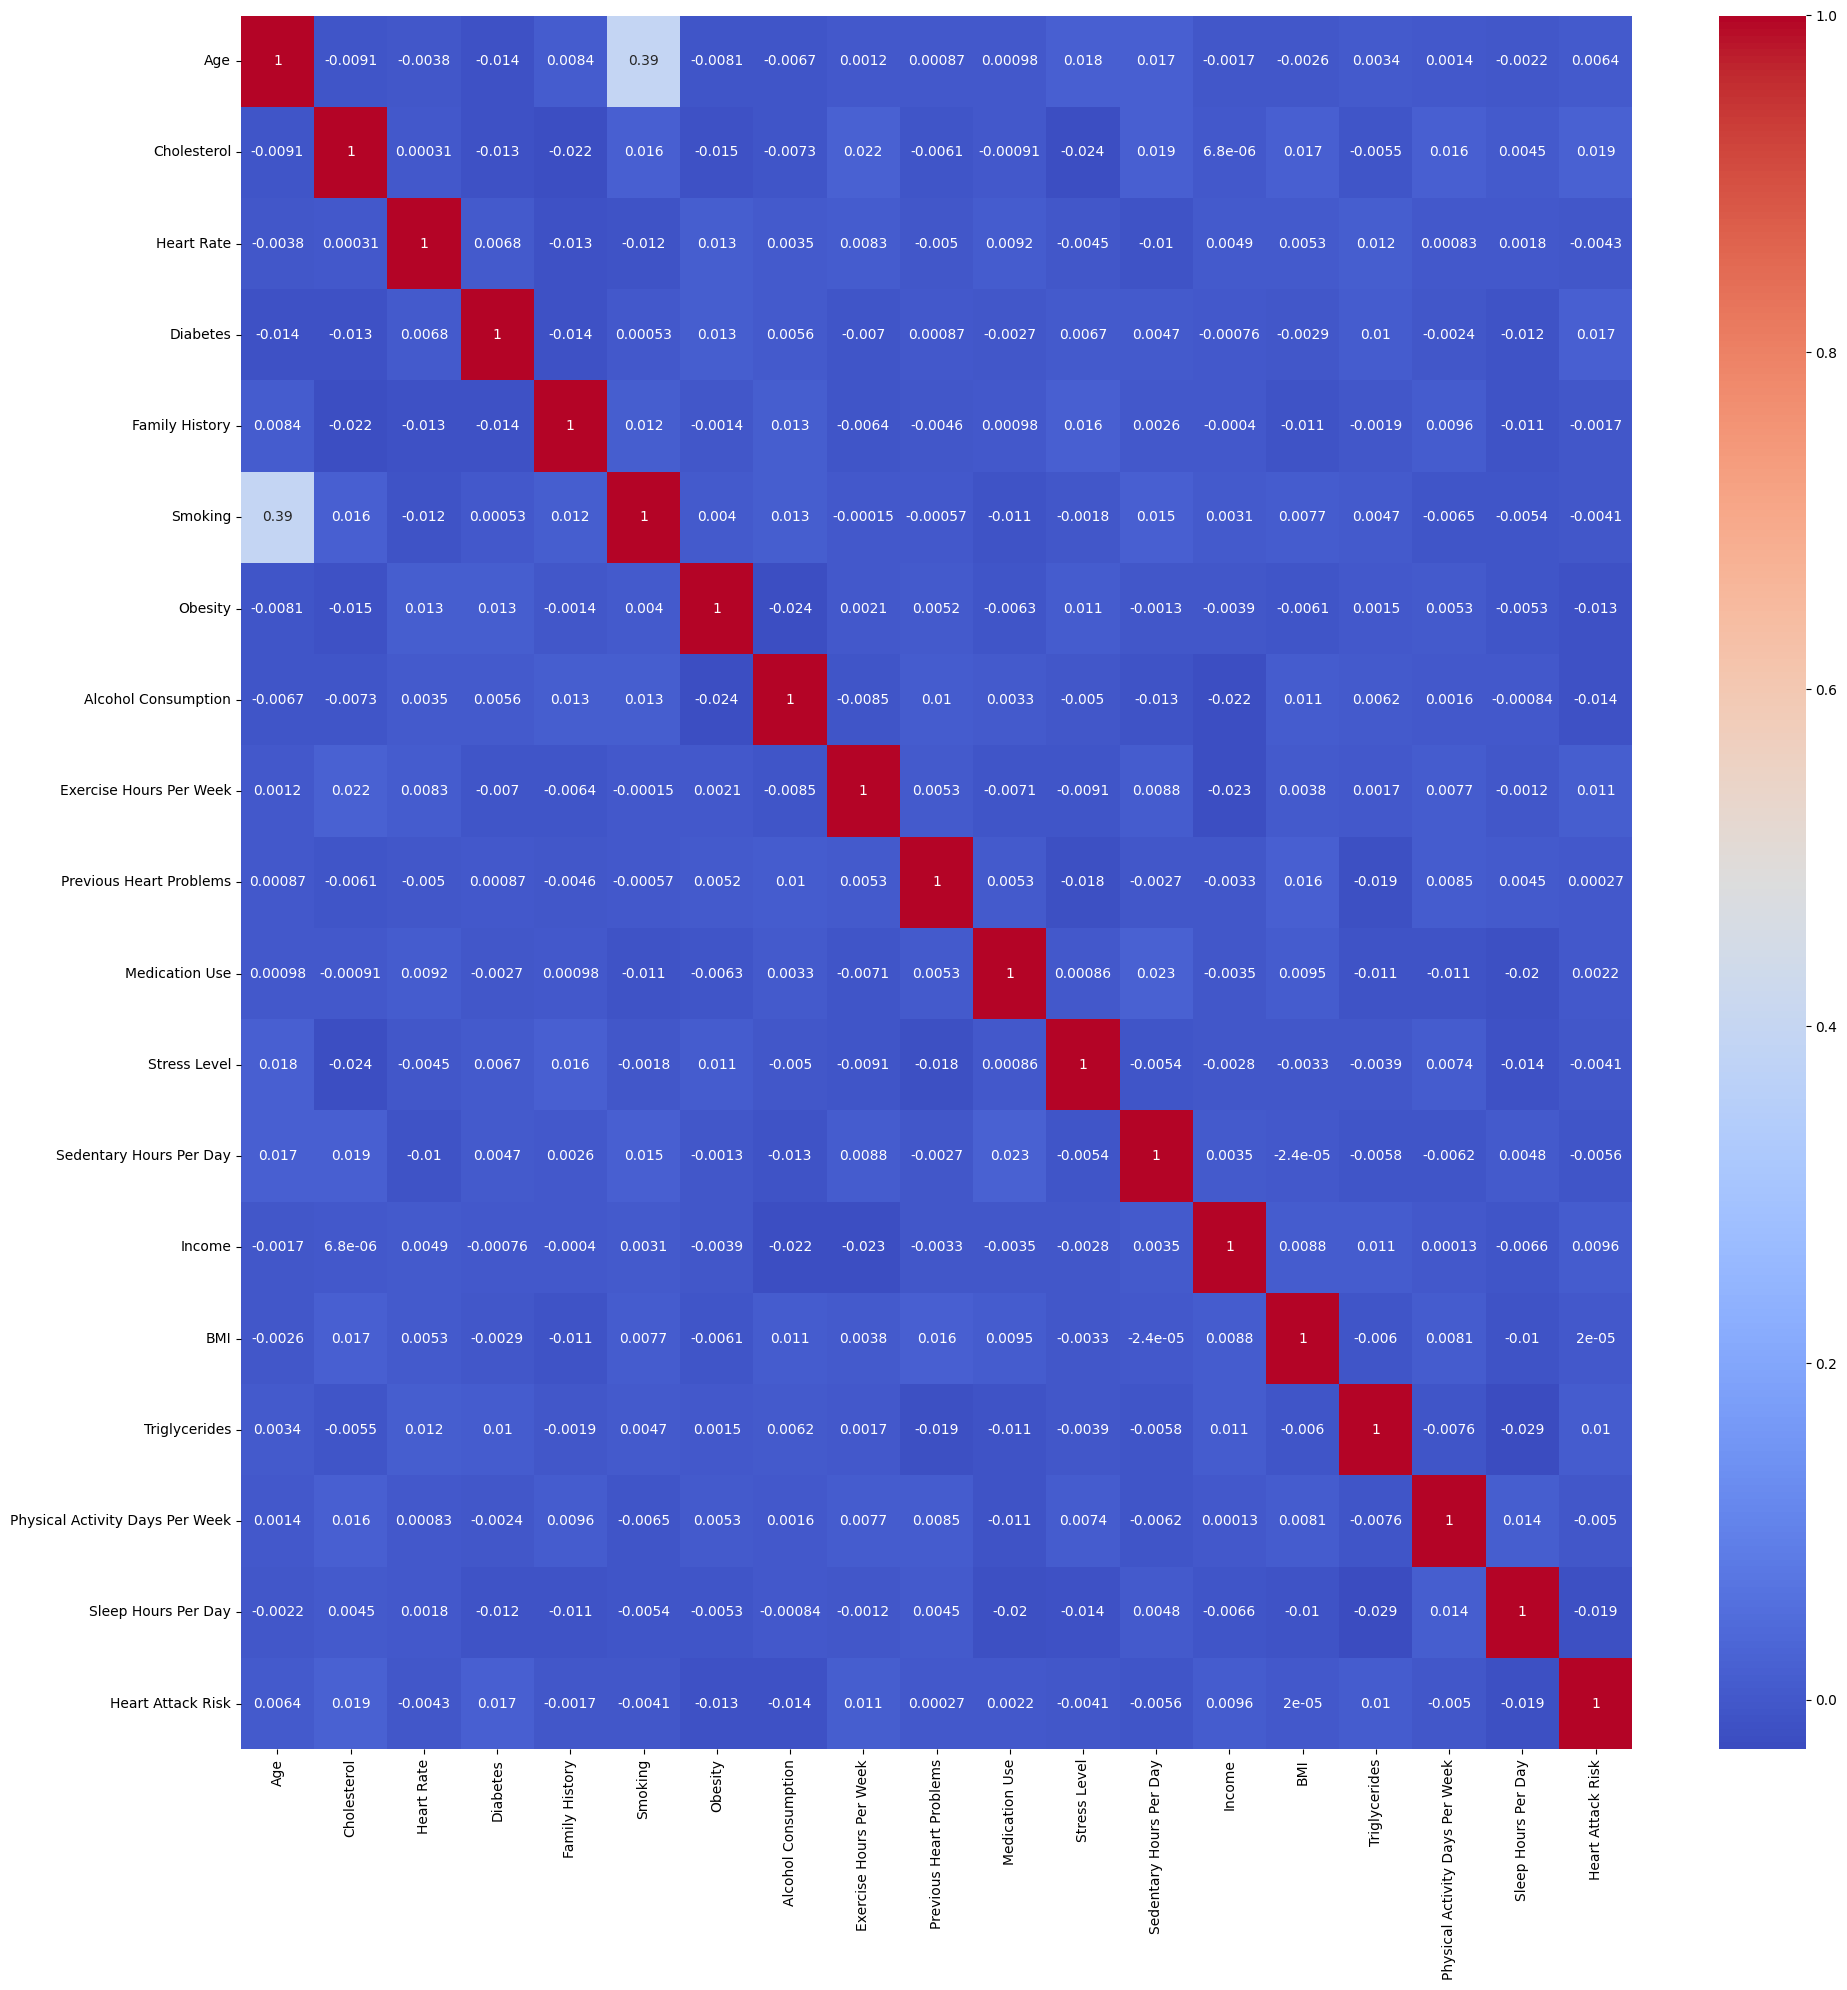

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [ ]:
numerical_NO_target = list(set(numerical_values) - set('Heart Attack Risk'))
numerical_NO_target

['Family History',
 'BMI',
 'Smoking',
 'Triglycerides',
 'Physical Activity Days Per Week',
 'Diabetes',
 'Heart Attack Risk',
 'Medication Use',
 'Sedentary Hours Per Day',
 'Income',
 'Alcohol Consumption',
 'Cholesterol',
 'Previous Heart Problems',
 'Age',
 'Heart Rate',
 'Stress Level',
 'Sleep Hours Per Day',
 'Exercise Hours Per Week',
 'Obesity']

In [ ]:
dropped_columns = set()

for row_idx in range(corr_matrix.values.shape[0]):
    for col_idx in range(row_idx + 1, corr_matrix.values.shape[0]):
        row_col = numerical_NO_target[row_idx]
        col_col = numerical_NO_target[col_idx]

        if row_col in dropped_columns or col_col in dropped_columns:
            continue

        if np.abs(corr_matrix.values[row_idx, col_idx]) > 0.7:
            var_row_corr_wth_response = np.abs(np.corrcoef(df['Heart Attack Risk'], df[row_col])[0, 1])
            var_col_corr_wth_response = np.abs(np.corrcoef(df['Heart Attack Risk'], df[col_col])[0, 1])

            if var_row_corr_wth_response > var_col_corr_wth_response:
                print('we will drop the column ', col_col)
                df = df.drop(columns=[col_col])
                dropped_columns.add(col_col)
            else:
                print('we will drop the column ', row_col)
                df = df.drop(columns=[row_col])
                dropped_columns.add(row_col)

**no high correlated functions so we don't drop any columns**

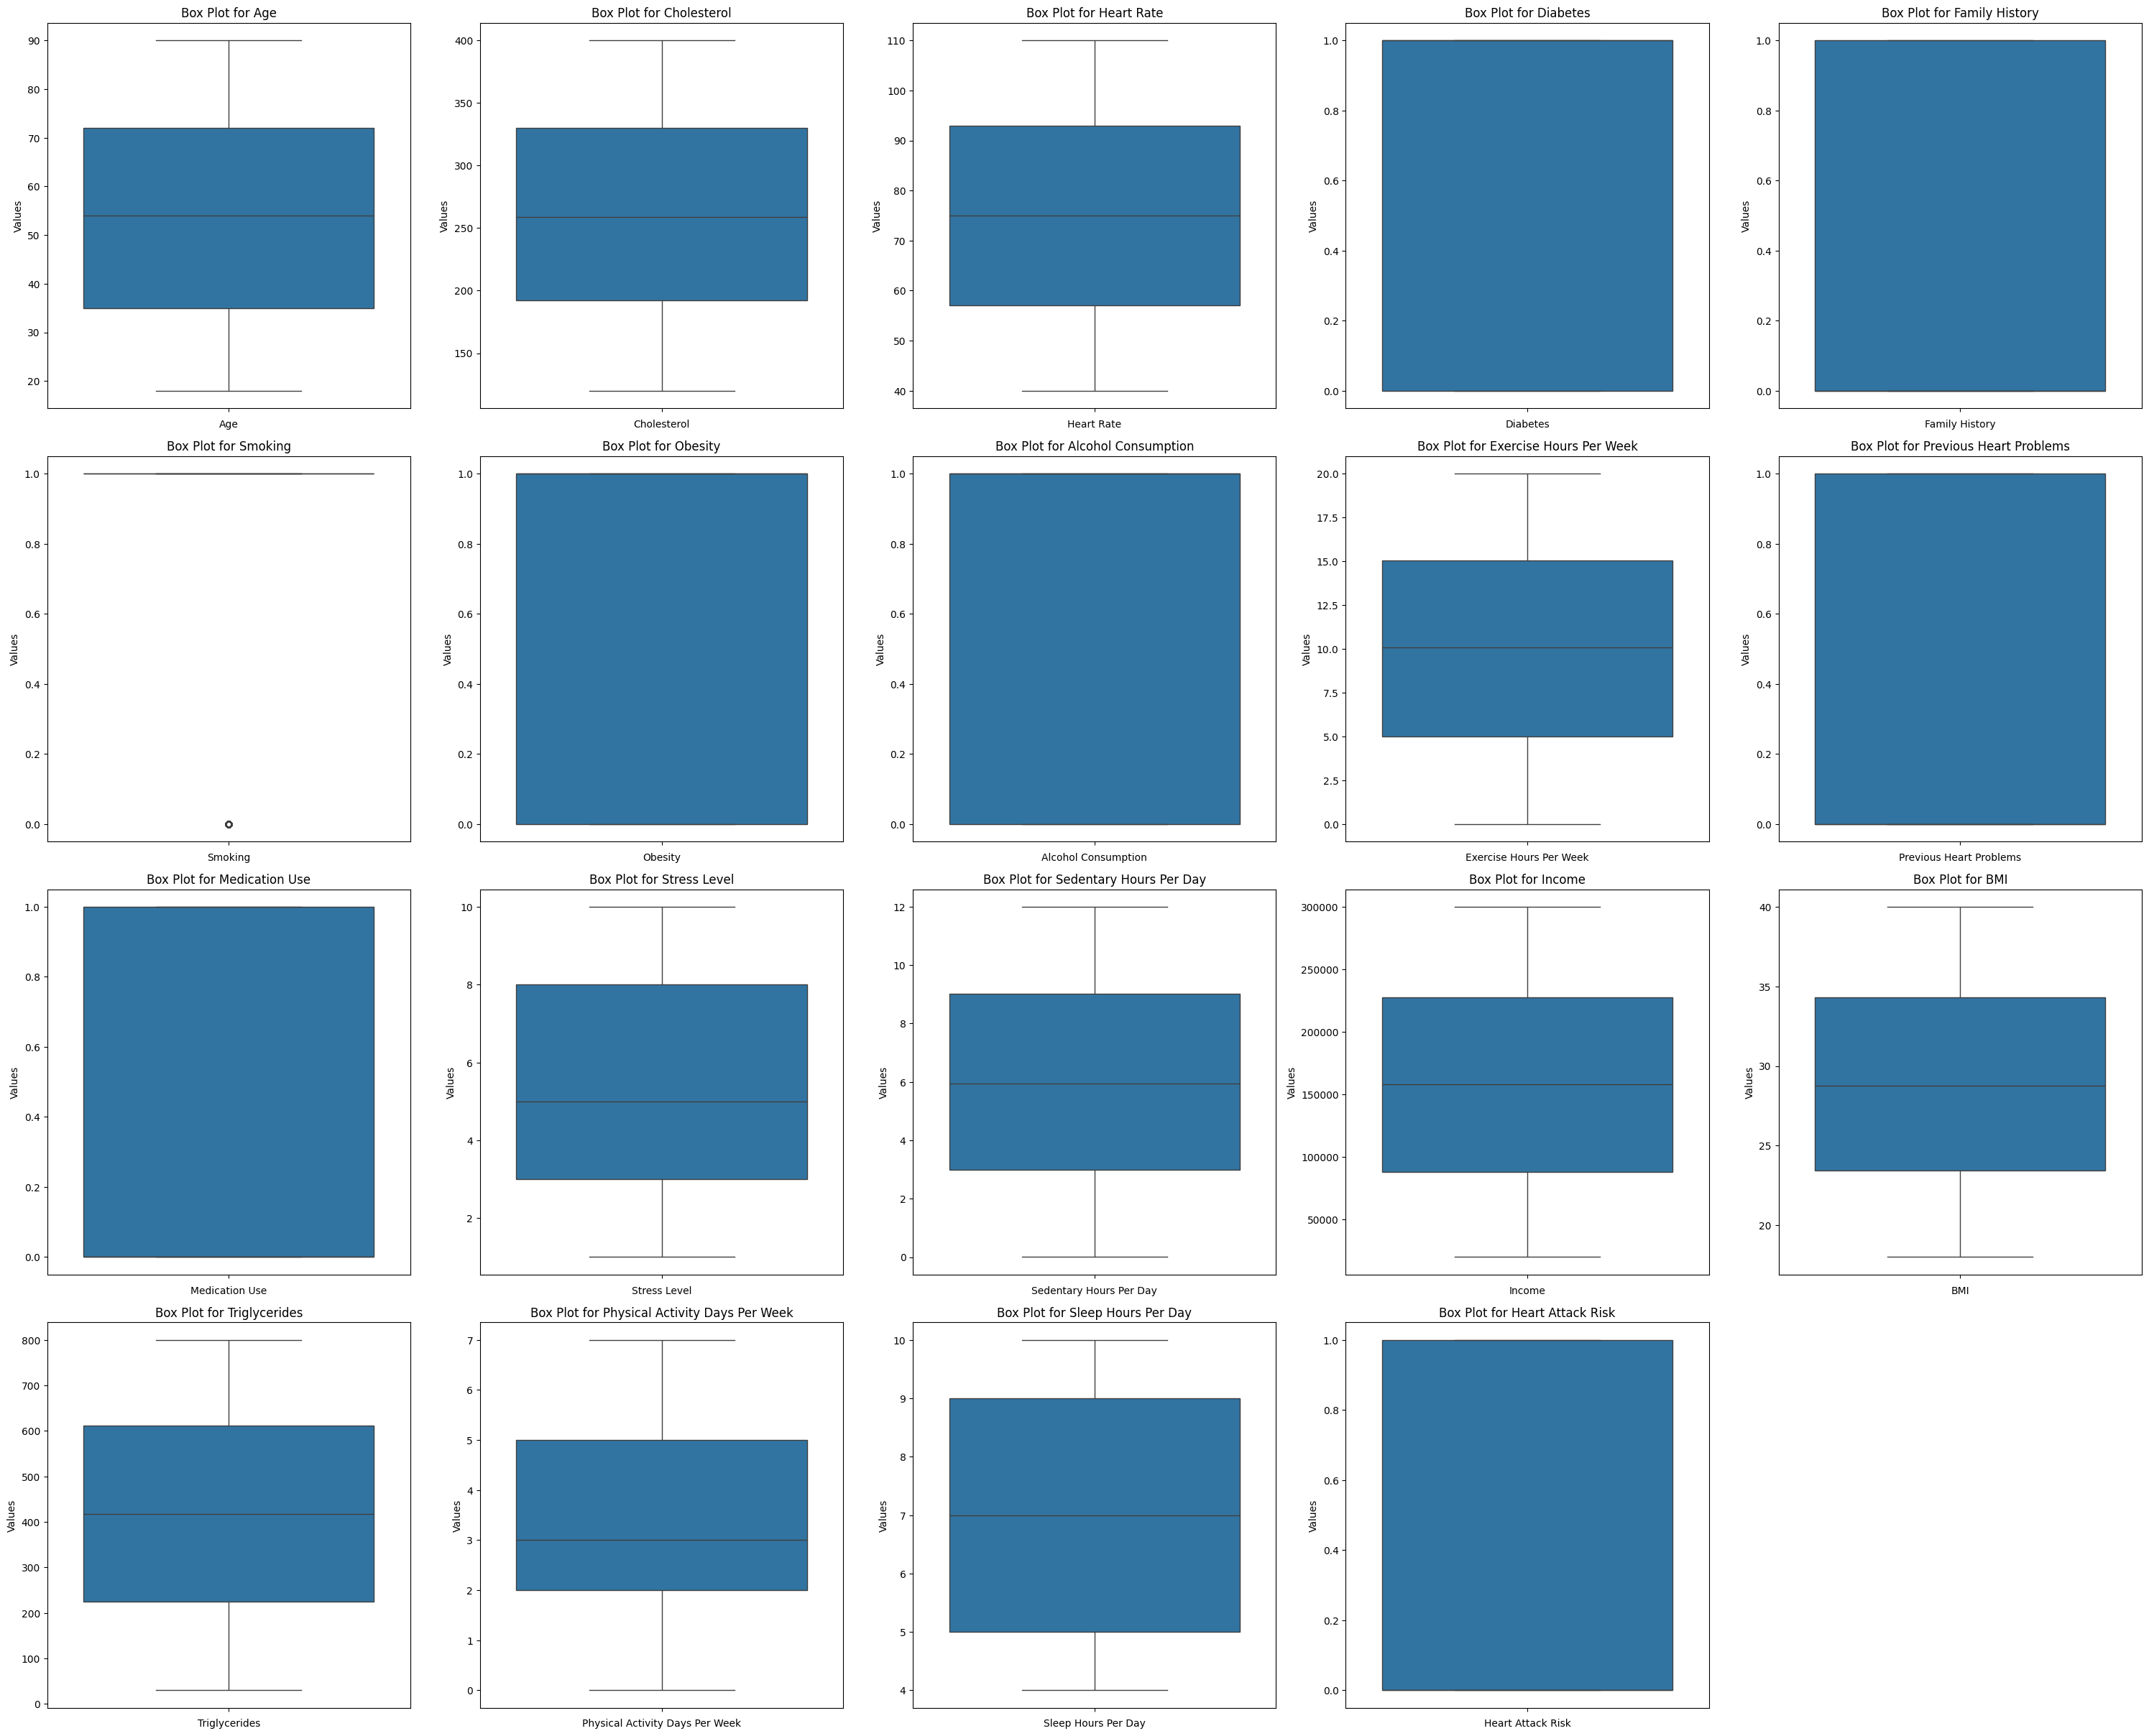

In [ ]:
num_features = numerical_values

plt.figure(figsize=(30, 30))
for i, feature in enumerate(numerical_values):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [ ]:
df['Blood Pressure'].value_counts()

Blood Pressure
146/94     8
101/93     8
106/64     7
102/104    7
176/77     7
          ..
155/102    1
154/71     1
178/90     1
98/85      1
119/67     1
Name: count, Length: 3915, dtype: int64

In [ ]:
def handle_blood_pressure_systolic(value):
    value = str(value)
    value = value.split('/')
    return int(value[0])

def handle_blood_pressure_diastolic(value):
    value = str(value)
    value = value.split('/')
    return int(value[1])


df['systolic_pressure'] = df['Blood Pressure'].apply(handle_blood_pressure_systolic)
df['diastolic_pressure'] = df['Blood Pressure'].apply(handle_blood_pressure_diastolic)

df.drop(columns='Blood Pressure', axis=1, inplace=True)

df.head()

Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0   67    Male          208          72         0               0        1   
1   21    Male          389          98         1               1        1   
2   21  Female          324          72         1               0        0   
3   84    Male          383          73         1               1        1   
4   66    Male          318          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0        0                    0                 4.168189  ...   
1        1                    1                 1.813242  ...   
2        0                    0                 2.078353  ...   
3        0                    1                 9.828130  ...   
4        1                    0                 5.804299  ...   

  Sedentary Hours Per Day  Income        BMI  Triglycerides  \
0                6.615001  261404  31.251233            286   
1                4.963459  285768  27.194973            235   
2                9.463426  235282  28.176571            587   
3                7.648981  125640  36.464704            378   
4                1.514821  160555  21.809144            231   

   Physical Activity Days Per Week  Sleep Hours Per Day    Country  \
0                                0                    6  Argentina   
1                                1                    7     Canada   
2                                4                    4     France   
3                                3                    4     Canada   
4                                1                    5   Thailand   

   Heart Attack Risk  systolic_pressure  diastolic_pressure  
0                  0                158                  88  
1                  0                165                  93  
2                  0                174                  99  
3                  0                163                 100  
4                  0                 91                  88  

[5 rows x 24 columns]

In [ ]:
numerical_values = df.describe().columns.to_list()
categorical_values = list(set(df.columns) - set(numerical_values))

**No outliers**

In [ ]:
df.shape

(8763, 24)

**Data Visualization**

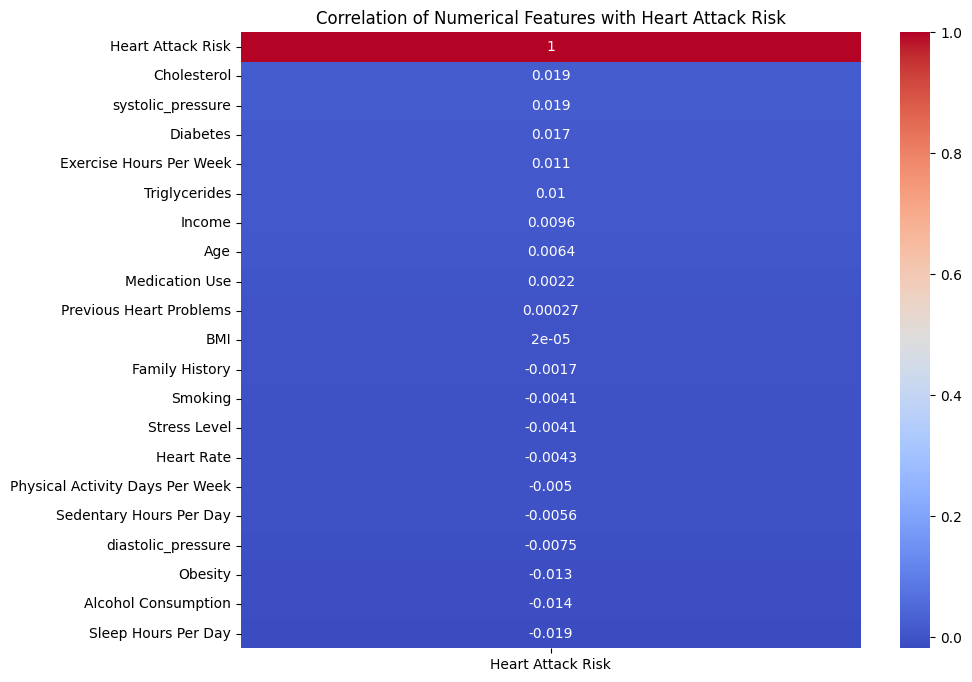

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_values].corr()
sns.heatmap(correlation_matrix[['Heart Attack Risk']].sort_values(by='Heart Attack Risk', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Numerical Features with Heart Attack Risk')
plt.show()

**The age interval in dataset**

In [ ]:

def age_class(x):
 number=int(x/10)+1
 if number==1:
   return '0-9 Years Old'
 elif number==2:
   return '10-19 Years Old'
 elif number==3:
   return '20-29 Years Old'
 elif number==4:
   return '30-39 Years Old'
 elif number==5:
   return '40-49 Years Old'
 elif number==6:
   return '50-59 Years Old'
 elif number==7:
   return '60-69 Years Old'
 elif number==8:
   return '70-79 Years Old'
 elif number==9:
   return '80-89 Years Old'
 elif number==10:
   return '90-99 Years Old'


df['n_th_age']=df['Age'].apply(age_class)

age_intervals=df['n_th_age'].value_counts()

In [ ]:
df['n_th_age']

0       60-69 Years Old
1       20-29 Years Old
2       20-29 Years Old
3       80-89 Years Old
4       60-69 Years Old
             ...       
8758    60-69 Years Old
8759    20-29 Years Old
8760    40-49 Years Old
8761    30-39 Years Old
8762    20-29 Years Old
Name: n_th_age, Length: 8763, dtype: object

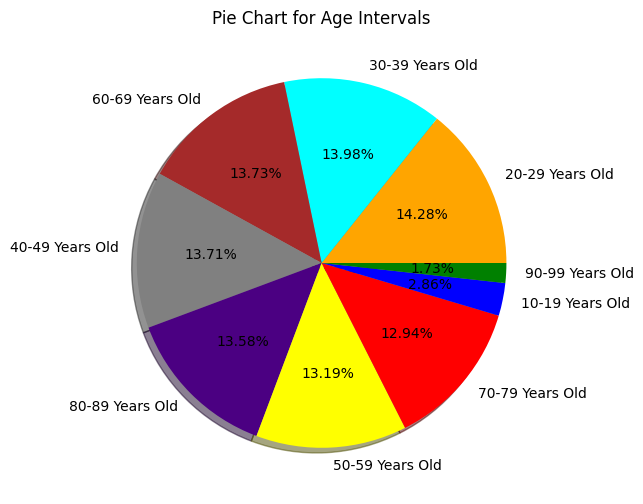

In [ ]:
import matplotlib.pyplot as plt

vals = df['n_th_age'].value_counts().values
idx = df['n_th_age'].value_counts().index

# Create a figure
plt.figure(figsize=(10, 6))

# Create a pie chart
plt.pie(x=vals, labels=idx,autopct='%1.2f%%',
        shadow=True, colors=('orange', 'cyan', 'brown', 'grey', 'indigo','yellow','red','blue','green','silver'))

# Set the title
plt.title('Pie Chart for Age Intervals')

# Show the plot
plt.show()


**Age intervals with Heart attack risk**

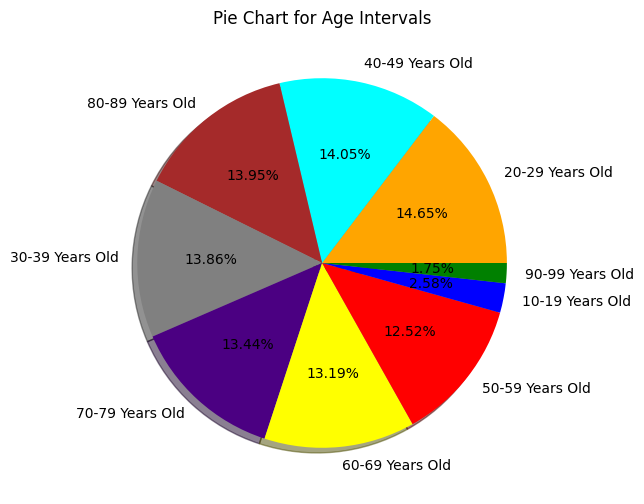

In [ ]:
import matplotlib.pyplot as plt

vals = df[df['Heart Attack Risk']==1]['n_th_age'].value_counts().values
idx = df[df['Heart Attack Risk']==1]['n_th_age'].value_counts().index

# Create a figure
plt.figure(figsize=(10, 6))

# Create a pie chart
plt.pie(x=vals, labels=idx,autopct='%1.2f%%',
        shadow=True, colors=('orange', 'cyan', 'brown', 'grey', 'indigo','yellow','red','blue','green','silver'))

# Set the title
plt.title('Pie Chart for Age Intervals')

# Show the plot
plt.show()

There is no person with age <=9 int this dataset

In [ ]:
df[df['Age']<=9]

Empty DataFrame
Columns: [Age, Sex, Cholesterol, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Heart Attack Risk, systolic_pressure, diastolic_pressure, n_th_age]
Index: []

[0 rows x 25 columns]

In [ ]:
df[df['n_th_age']=='0-9 Years Old']

Empty DataFrame
Columns: [Age, Sex, Cholesterol, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Heart Attack Risk, systolic_pressure, diastolic_pressure, n_th_age]
Index: []

[0 rows x 25 columns]

In [ ]:
df.drop(columns={'n_th_age'},axis=1,inplace=True)

In [ ]:
import plotly.graph_objects as go

for feature in categorical_values:
    # Filter data for Heart Attack Risk == 1
    filtered_df = df[df['Heart Attack Risk'] == 1]

    # Get counts for each category
    category_counts = filtered_df[feature].value_counts()

    # Create the pie chart
    fig = go.Figure(data=[go.Pie(labels=category_counts.index, values=category_counts.values)])

    fig.update_layout(
        title=f'Distribution of {feature} for Heart Attack Risk == 1',
        height=600,
        width=800
    )

    fig.show()

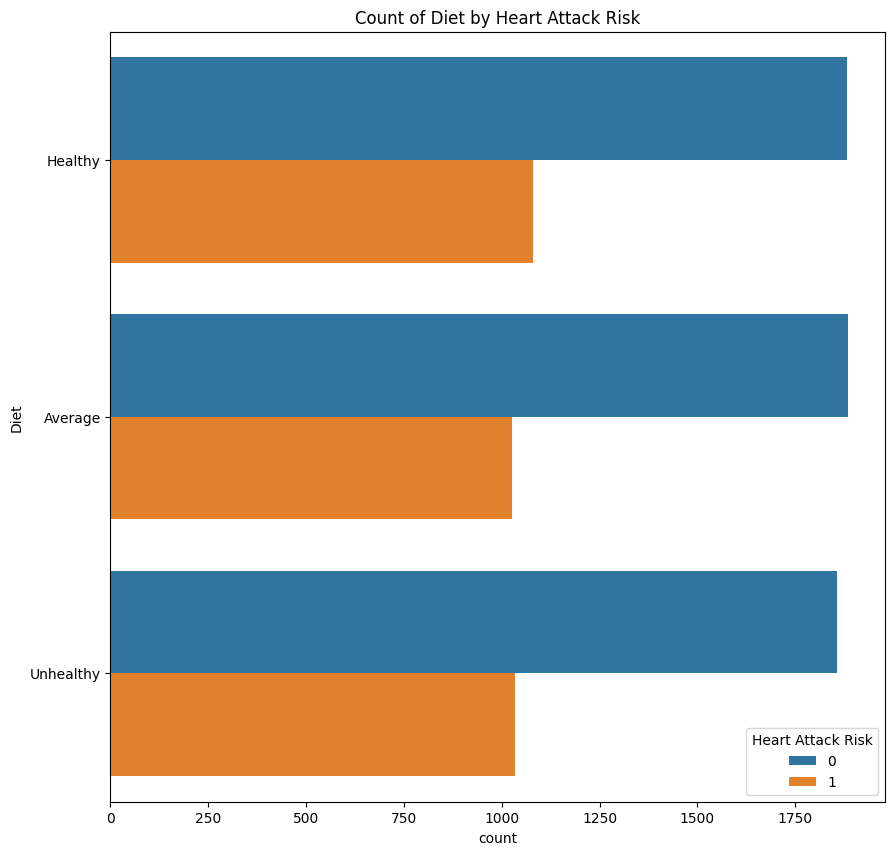

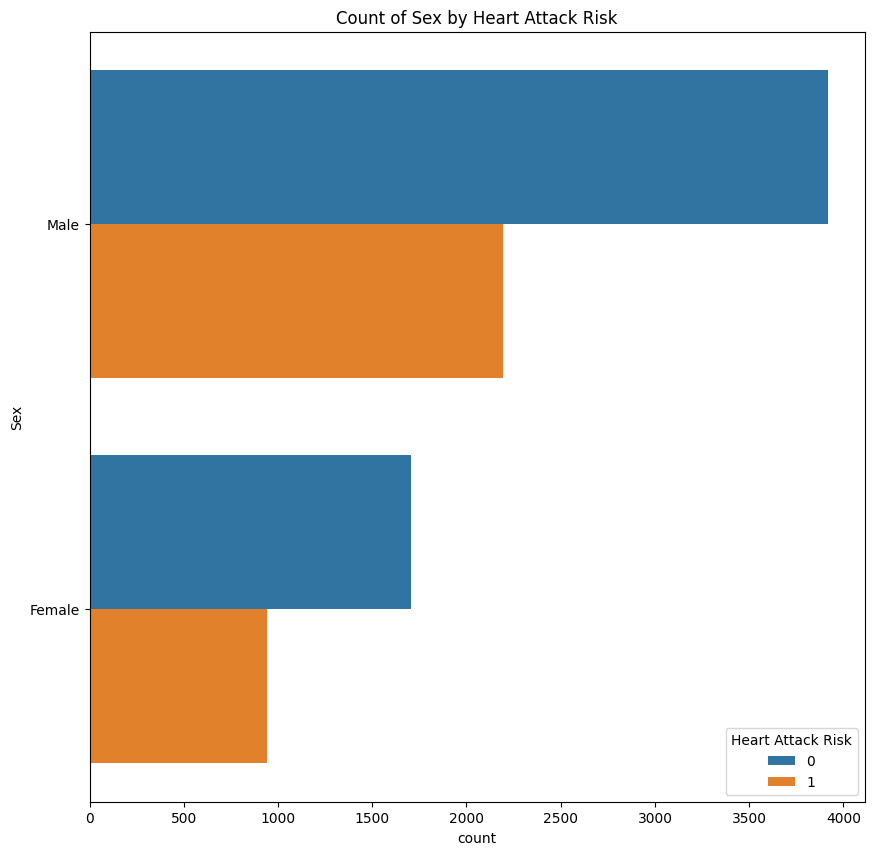

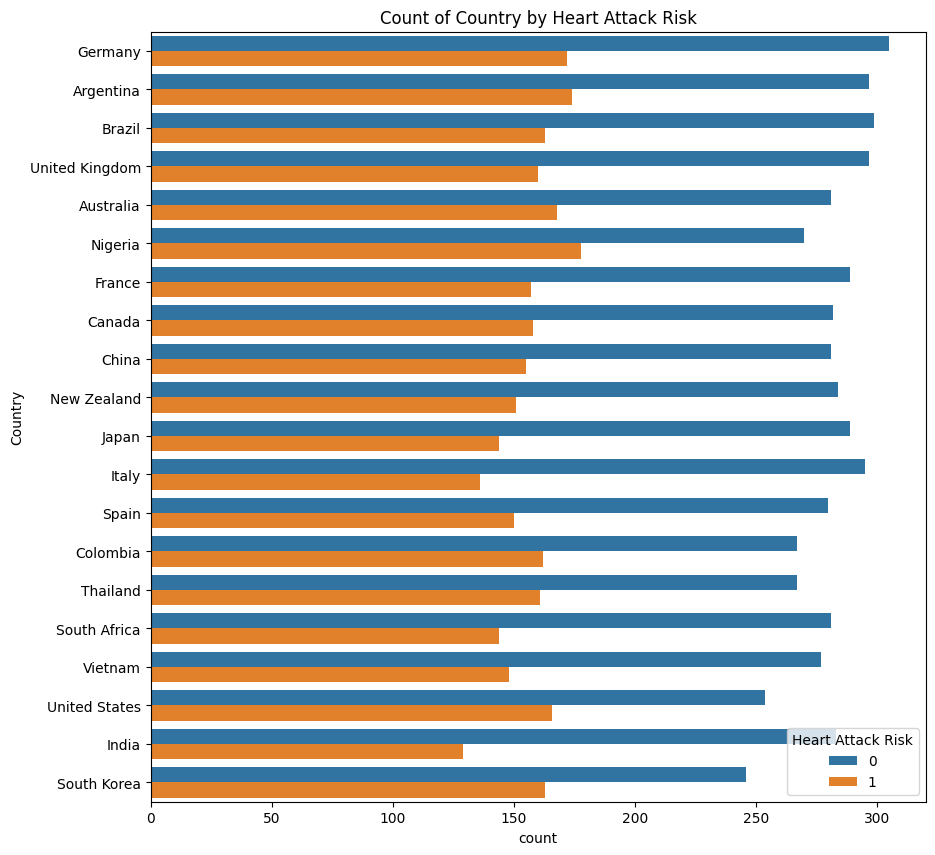

In [ ]:

for feature in categorical_values:
    plt.figure(figsize=(10, 10))
    sorted_df = df[feature].value_counts().index
    sns.countplot(y=feature, hue='Heart Attack Risk', data=df, order=sorted_df)
    plt.title(f'Count of {feature} by Heart Attack Risk')
    plt.show()

In [ ]:
import plotly.express as px

# Boxplots for numerical features categorized by Heart Attack Risk
for feature in ['Age','Cholesterol','Heart Rate','Exercise Hours Per Week','Physical Activity Days Per Week']:
    fig = px.box(df, x='Heart Attack Risk', y=feature, title=f'Distribution of {feature} by Heart Attack Risk')
    fig.show()

In [ ]:
for feature in numerical_values:
    fig = px.histogram(df, x=feature, color='Heart Attack Risk', marginal='box', nbins=50,
                       title=f'Distribution of {feature} by Heart Attack Risk', opacity=0.7)
    fig.show()


In [ ]:
import plotly.express as px

for feature in ['Country', 'Sex']:
    # Group by feature and Heart Attack Risk to get the counts, then sort the feature by the total count
    sorted_df = df.groupby(feature).size().sort_values(ascending=False).index

    # Create the histogram with sorted categories
    fig = px.histogram(df, y=feature, color='Heart Attack Risk', category_orders={feature: sorted_df})

    fig.update_layout(
        title=f'Count of {feature} by Heart Attack Risk (Sorted)',
        xaxis_title='Count',
        yaxis_title=feature,
        height=600,
        width=900
    )

    fig.show()

In [ ]:
import plotly.express as px

# Pie chart to show the proportion of Heart Attack Risk (0 and 1)
fig = px.pie(df, names='Heart Attack Risk', title='Distribution of Heart Attack Risk',
             color_discrete_sequence=['#3498db', '#e74c3c'])  # Blue for 0, Red for 1

fig.update_traces(textinfo='percent+label')  # Show percentage and label on pie
fig.show()

In [ ]:
import plotly.express as px

for feature in ['Country','Sex']:
    # Filter data for Heart Attack Risk == 1
    filtered_df = df[df['Heart Attack Risk'] == 1]

    # Sort the categorical feature by count
    sorted_df = filtered_df[feature].value_counts().index

    # Create the histogram
    fig = px.histogram(filtered_df, y=feature, category_orders={feature: sorted_df})

    fig.update_layout(
        title=f'Count of {feature} for Heart Attack Risk == 1',
        xaxis_title='Count',
        yaxis_title=feature,
        height=600,
        width=900
    )
    fig.show()

##What we will do ?
##1- handling Blood Pressure column
##2- Encode Categorical Features
##3- Standarization Numerical Features
##4- Binning
##5- Handling imbalanced Dataset

In [ ]:
df.shape

(8763, 24)

In [ ]:
df=pd.get_dummies(df,columns=['Sex'])



def diet_map(x):
  if x=='Unhealthy':
   return 0
  elif x=='Average':
   return 1
  else :
   return 2

df['Diet']=df['Diet'].apply(diet_map)



coun=(df[df['Heart Attack Risk']==1]['Country'].value_counts()/(df[df['Heart Attack Risk']==1]['Country'].value_counts()+df[df['Heart Attack Risk']==0]['Country'].value_counts())*100).sort_values(ascending=True)


coun=coun.index.to_list()


def risk_map(x):
  return coun.index(x)+1


df['Country']=df['Country'].apply(risk_map)

df['Country']


0       14
1       12
2        9
3       12
4       16
        ..
8758    16
8759    12
8760    10
8761    10
8762     8
Name: Country, Length: 8763, dtype: int64

In [ ]:
df.to_csv('Heart Risk Attack After cleanning.csv')

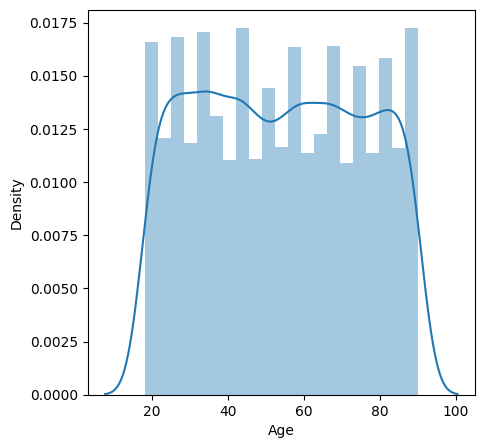

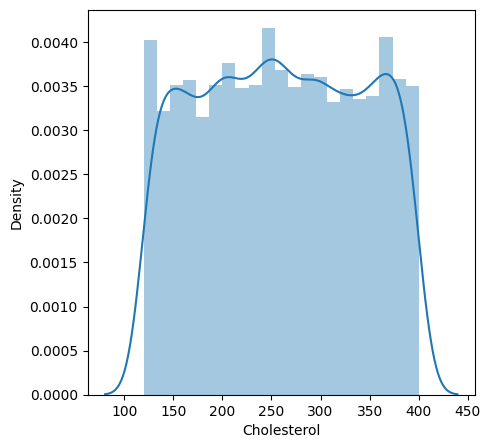

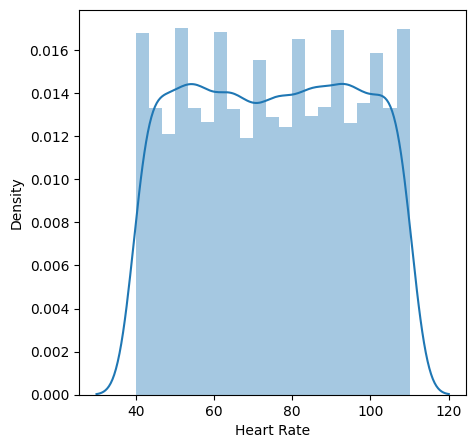

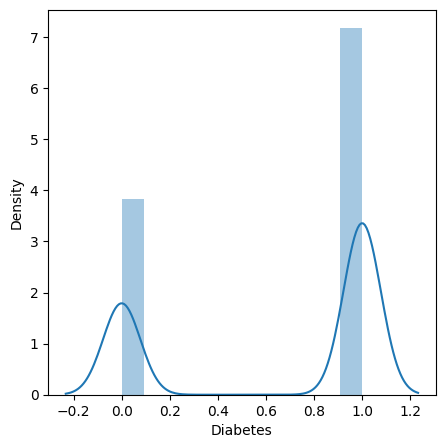

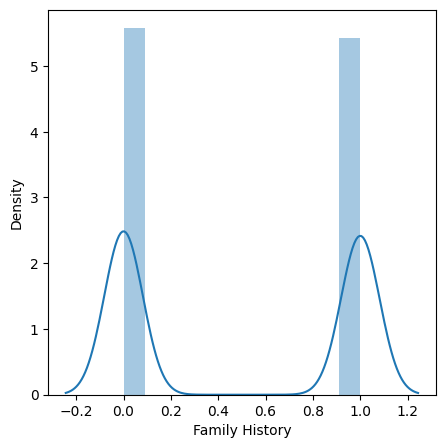

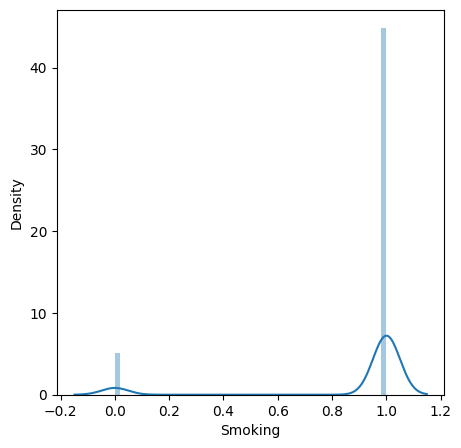

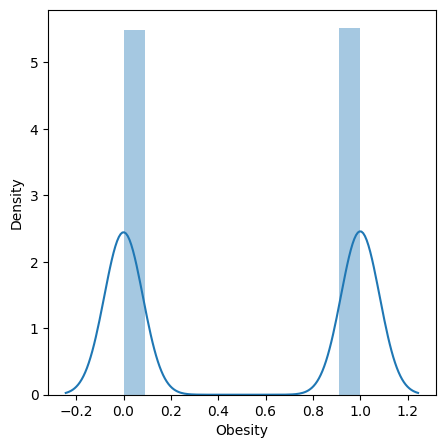

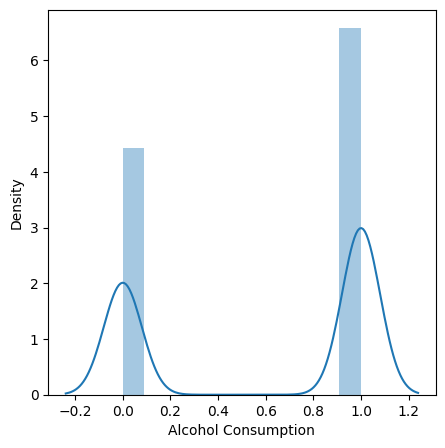

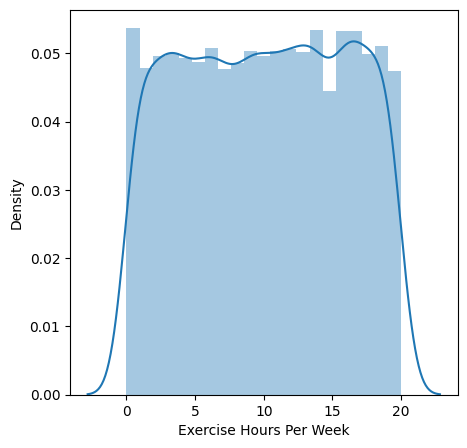

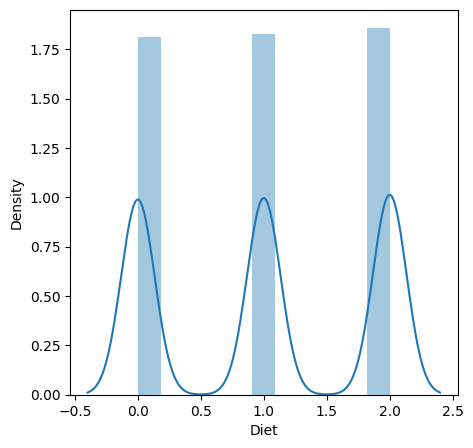

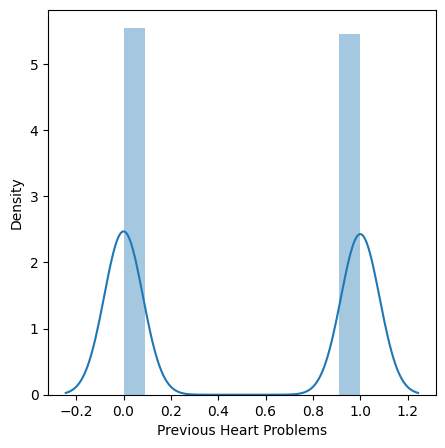

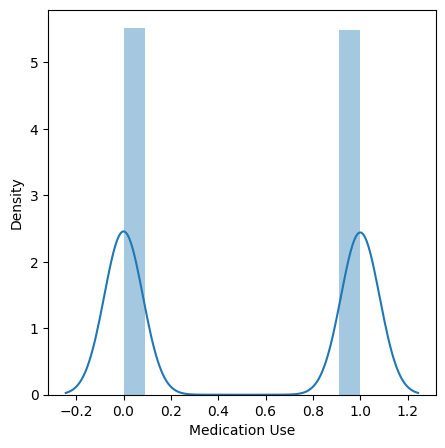

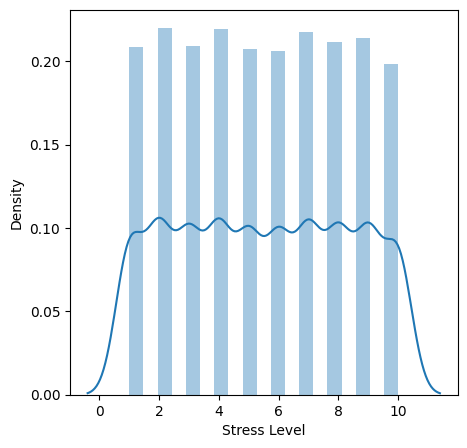

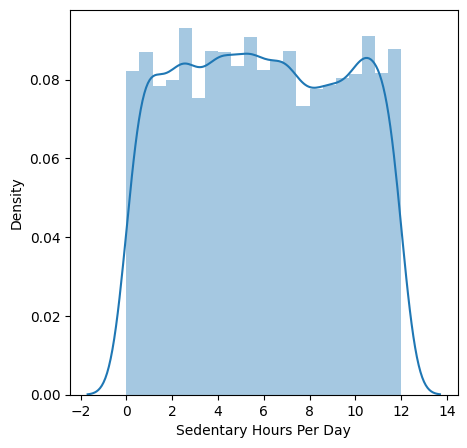

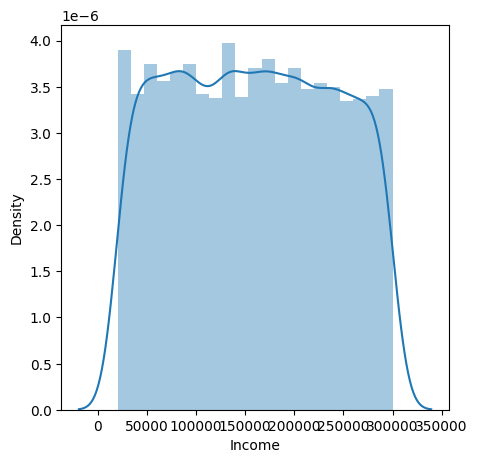

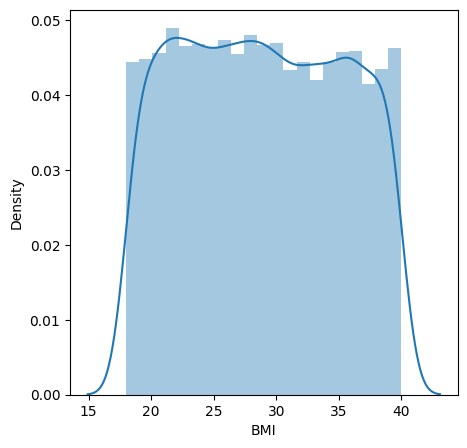

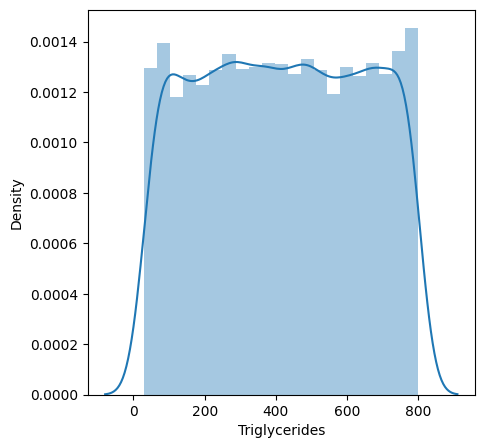

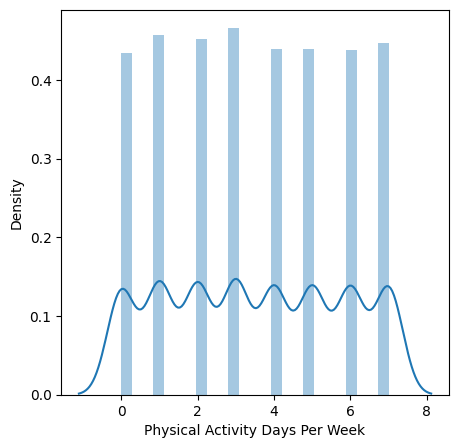

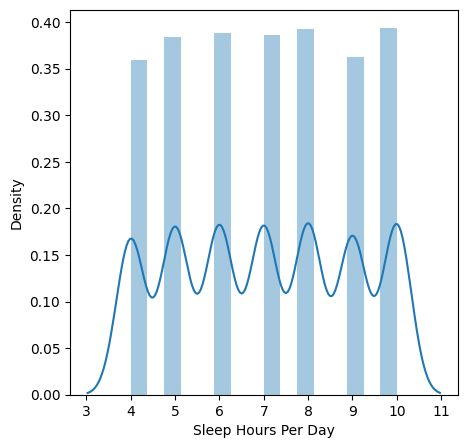

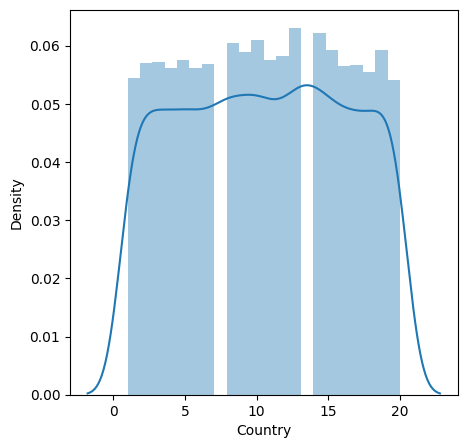

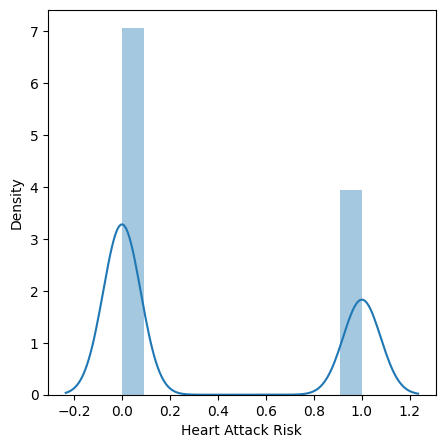

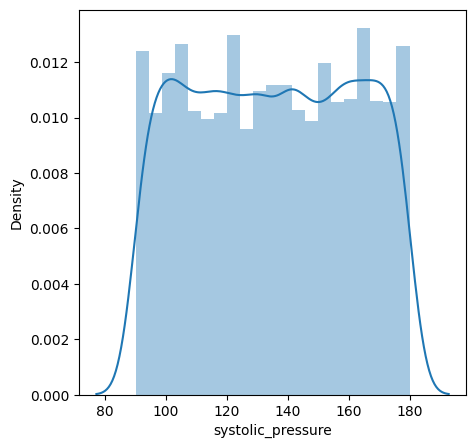

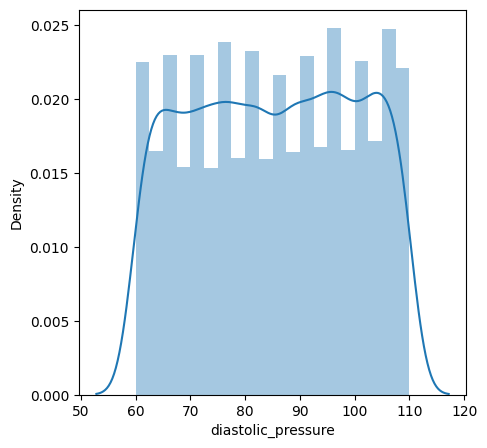

In [ ]:
# first i will check is it follows the normal dist or not
num_cols = df.select_dtypes(include=np.number).columns.to_list()
for col in num_cols:
    plt.figure(figsize=(5,5))
    sns.distplot(df[col])
    plt.show()

In [ ]:
to_std = ['Age','Cholesterol','Heart Rate', 'Exercise Hours Per Week','Sedentary Hours Per Day','Income','BMI','Triglycerides' ,'systolic_pressure','diastolic_pressure']
to_minmax = ['Stress Level','Sleep Hours Per Day','Physical Activity Days Per Week']

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

df[to_std] = std_scaler.fit_transform(df[to_std])
df[to_minmax] = minmax_scaler.fit_transform(df[to_minmax])

df

Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0     0.625557    -0.641579   -0.147042         0               0        1   
1    -1.539322     1.596895    1.118179         1               1        1   
2    -1.539322     0.793023   -0.147042         1               0        0   
3     1.425621     1.522691   -0.098380         1               1        1   
4     0.578495     0.718820    0.874867         1               1        1   
...        ...          ...         ...       ...             ...      ...   
8758  0.296119    -1.717530   -0.682328         1               1        1   
8759 -1.209884    -1.729898   -0.098380         1               0        0   
8760 -0.315695    -0.122154    1.458815         0               1        1   
8761 -0.833383    -1.012597   -0.730990         1               0        1   
8762 -1.351072     1.188775   -0.001055         1               1        0   

      Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  ...  \
0           0                    0                -1.010838     1  ...   
1           1                    1                -1.418027     0  ...   
2           0                    0                -1.372188     2  ...   
3           0                    1                -0.032188     1  ...   
4           1                    0                -0.727941     0  ...   
...       ...                  ...                      ...   ...  ...   
8758        0                    1                -0.362578     2  ...   
8759        1                    0                 1.131536     2  ...   
8760        1                    1                -1.187161     1  ...   
8761        0                    0                -1.076238     0  ...   
8762        0                    1                 1.394931     2  ...   

           BMI  Triglycerides  Physical Activity Days Per Week  \
0     0.373454      -0.588539                         0.000000   
1    -0.268479      -0.816487                         0.142857   
2    -0.113134       0.756800                         0.571429   
3     1.198524      -0.177339                         0.428571   
4    -1.120826      -0.834365                         0.142857   
...        ...            ...                              ...   
8758 -1.461594      -1.567374                         1.000000   
8759 -0.775078       0.890887                         0.571429   
8760  1.030999       0.488626                         0.571429   
8761 -0.252804      -1.357305                         0.285714   
8762  0.636623      -1.062313                         1.000000   

      Sleep Hours Per Day  Country  Heart Attack Risk  systolic_pressure  \
0                0.333333       14                  0           0.870044   
1                0.500000       12                  0           1.135714   
2                0.000000        9                  0           1.477290   
3                0.000000       12                  0           1.059809   
4                0.166667       16                  0          -1.672797   
...                   ...      ...                ...                ...   
8758             0.500000       16                  0          -1.558939   
8759             0.833333       12                  0           0.832092   
8760             0.000000       10                  1           0.983903   
8761             0.666667       10                  0          -0.610117   
8762             0.000000        8                  1           0.110987   

      diastolic_pressure  Sex_Female  Sex_Male  
0               0.193782       False      True  
1               0.534480       False      True  
2               0.943319        True     False  
3               1.011458       False      True  
4               0.193782       False      True  
...                  ...         ...       ...  
8758           -0.623895       False      True  
8759            1.147738        True     False  
8760           -0.692035       False  

In [ ]:
df[df['Heart Attack Risk'] == 1]['Country'].value_counts()

Country
19    178
14    174
13    172
15    168
18    166
10    163
20    163
17    162
16    161
8     160
12    158
9     157
11    155
5     151
7     150
6     148
4     144
3     144
2     136
1     129
Name: count, dtype: int64

In [ ]:
df

Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0     0.625557    -0.641579   -0.147042         0               0        1   
1    -1.539322     1.596895    1.118179         1               1        1   
2    -1.539322     0.793023   -0.147042         1               0        0   
3     1.425621     1.522691   -0.098380         1               1        1   
4     0.578495     0.718820    0.874867         1               1        1   
...        ...          ...         ...       ...             ...      ...   
8758  0.296119    -1.717530   -0.682328         1               1        1   
8759 -1.209884    -1.729898   -0.098380         1               0        0   
8760 -0.315695    -0.122154    1.458815         0               1        1   
8761 -0.833383    -1.012597   -0.730990         1               0        1   
8762 -1.351072     1.188775   -0.001055         1               1        0   

      Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  ...  \
0           0                    0                -1.010838     1  ...   
1           1                    1                -1.418027     0  ...   
2           0                    0                -1.372188     2  ...   
3           0                    1                -0.032188     1  ...   
4           1                    0                -0.727941     0  ...   
...       ...                  ...                      ...   ...  ...   
8758        0                    1                -0.362578     2  ...   
8759        1                    0                 1.131536     2  ...   
8760        1                    1                -1.187161     1  ...   
8761        0                    0                -1.076238     0  ...   
8762        0                    1                 1.394931     2  ...   

           BMI  Triglycerides  Physical Activity Days Per Week  \
0     0.373454      -0.588539                         0.000000   
1    -0.268479      -0.816487                         0.142857   
2    -0.113134       0.756800                         0.571429   
3     1.198524      -0.177339                         0.428571   
4    -1.120826      -0.834365                         0.142857   
...        ...            ...                              ...   
8758 -1.461594      -1.567374                         1.000000   
8759 -0.775078       0.890887                         0.571429   
8760  1.030999       0.488626                         0.571429   
8761 -0.252804      -1.357305                         0.285714   
8762  0.636623      -1.062313                         1.000000   

      Sleep Hours Per Day  Country  Heart Attack Risk  systolic_pressure  \
0                0.333333       14                  0           0.870044   
1                0.500000       12                  0           1.135714   
2                0.000000        9                  0           1.477290   
3                0.000000       12                  0           1.059809   
4                0.166667       16                  0          -1.672797   
...                   ...      ...                ...                ...   
8758             0.500000       16                  0          -1.558939   
8759             0.833333       12                  0           0.832092   
8760             0.000000       10                  1           0.983903   
8761             0.666667       10                  0          -0.610117   
8762             0.000000        8                  1           0.110987   

      diastolic_pressure  Sex_Female  Sex_Male  
0               0.193782       False      True  
1               0.534480       False      True  
2               0.943319        True     False  
3               1.011458       False      True  
4               0.193782       False      True  
...                  ...         ...       ...  
8758           -0.623895       False      True  
8759            1.147738        True     False  
8760           -0.692035       False  

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

runs=RandomOverSampler(sampling_strategy=1)
df,df['Heart Attack Risk']=runs.fit_resample(df,df['Heart Attack Risk'])

In [ ]:
df

Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0      0.625557    -0.641579   -0.147042         0               0        1   
1     -1.539322     1.596895    1.118179         1               1        1   
2     -1.539322     0.793023   -0.147042         1               0        0   
3      1.425621     1.522691   -0.098380         1               1        1   
4      0.578495     0.718820    0.874867         1               1        1   
...         ...          ...         ...       ...             ...      ...   
11243 -0.409820    -0.320030    0.874867         1               0        1   
11244  1.049121     0.966165   -1.558250         0               1        1   
11245  1.613872    -1.519654    1.702127         1               1        1   
11246 -0.739258     1.349550    1.507477         1               1        0   
11247 -1.256947     0.731187   -1.168951         0               1        1   

       Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  ...  \
0            0                    0                -1.010838     1  ...   
1            1                    1                -1.418027     0  ...   
2            0                    0                -1.372188     2  ...   
3            0                    1                -0.032188     1  ...   
4            1                    0                -0.727941     0  ...   
...        ...                  ...                      ...   ...  ...   
11243        1                    0                -0.690955     1  ...   
11244        1                    0                 1.653452     0  ...   
11245        0                    1                -0.146670     1  ...   
11246        1                    0                -1.636076     0  ...   
11247        0                    1                -1.533320     1  ...   

            BMI  Triglycerides  Physical Activity Days Per Week  \
0      0.373454      -0.588539                         0.000000   
1     -0.268479      -0.816487                         0.142857   
2     -0.113134       0.756800                         0.571429   
3      1.198524      -0.177339                         0.428571   
4     -1.120826      -0.834365                         0.142857   
...         ...            ...                              ...   
11243  0.546766       1.391478                         0.857143   
11244 -1.167020       0.595896                         0.428571   
11245 -1.378386      -0.302487                         0.571429   
11246 -0.376442      -1.182992                         0.428571   
11247  0.946402      -1.545026                         0.285714   

       Sleep Hours Per Day  Country  Heart Attack Risk  systolic_pressure  \
0                 0.333333       14                  0           0.870044   
1                 0.500000       12                  0           1.135714   
2                 0.000000        9                  0           1.477290   
3                 0.000000       12                  0           1.059809   
4                 0.166667       16                  0          -1.672797   
...                    ...      ...                ...                ...   
11243             0.666667       17                  1           0.262799   
11244             0.166667        5                  1          -0.534212   
11245             0.833333       19                  1          -1.558939   
11246             0.166667       20                  1           0.794139   
11247             0.833333       12                  1          -1.445080   

       diastolic_pressure  Sex_Female  Sex_Male  
0                0.193782       False      True  
1                0.534480       False      True  
2                0.943319        True     False  
3                1.011458       False      True  
4                0.193782       False      True  
...                   ...         ...       ...  
11243            0.807039       False      True  
11244            1.079598       

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11243     True
11244     True
11245     True
11246     True
11247     True
Length: 11248, dtype: bool

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import xgboost as xgb

In [ ]:
def evaluate_and_plot(model, x_test, y_test):
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  metrics = [accuracy, auc, precision, recall]
  metric_labels = ['Accuracy', 'AUC', 'Precision', 'Recall']

  plt.figure(figsize=(8, 6))
  p=plt.bar(metric_labels,metrics, color=['red','pink','orange','brown'])
  plt.bar_label(p,labels=map(lambda n:"%.3f" % n,metrics),fmt='{.00f}')
  plt.title('Model Evaluation Metrics')
  plt.ylabel('Percentage')
  plt.ylim(0, 1)  # Set y-axis limits to 0-1 for percentages
  plt.show()

In [ ]:
x=df.drop('Heart Attack Risk',axis=1)
y=df['Heart Attack Risk']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
# Assuming you have your data (X_train, y_train) ready
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(x_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

pd.DataFrame({'column':x_train.columns.to_list(),'importance':feature_importances}).sort_values(by='importance')


column  importance
5                           Smoking    0.005241
22                       Sex_Female    0.008192
23                         Sex_Male    0.008276
3                          Diabetes    0.010202
6                           Obesity    0.011314
4                    Family History    0.011429
11                   Medication Use    0.011469
10          Previous Heart Problems    0.011484
7               Alcohol Consumption    0.011565
9                              Diet    0.019575
18              Sleep Hours Per Day    0.035687
17  Physical Activity Days Per Week    0.038963
12                     Stress Level    0.043114
19                          Country    0.052248
21               diastolic_pressure    0.063637
2                        Heart Rate    0.066270
0                               Age    0.066798
20                systolic_pressure    0.068506
1                       Cholesterol    0.073924
13          Sedentary Hours Per Day    0.075246
8           Exercise Hours Per Week    0.075594
16                    Triglycerides    0.076295
14                           Income    0.076759
15                              BMI    0.078212

In [ ]:
Acc=[]
model_name=[]

              precision    recall  f1-score   support

           0       0.50      0.51      0.51      1120
           1       0.50      0.49      0.50      1130

    accuracy                           0.50      2250
   macro avg       0.50      0.50      0.50      2250
weighted avg       0.50      0.50      0.50      2250



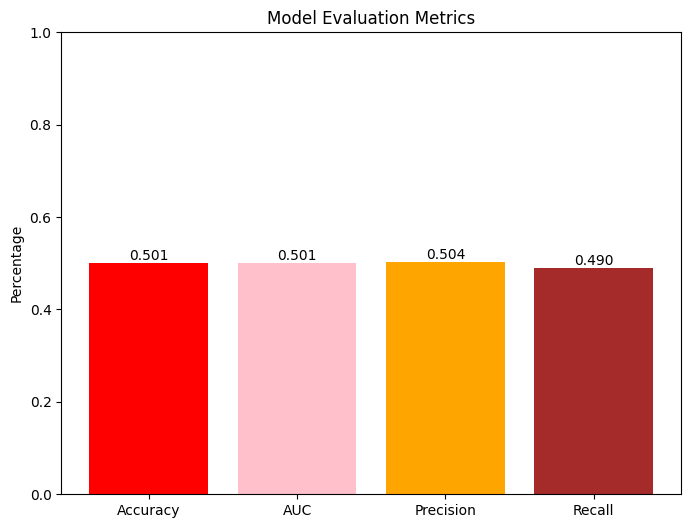

In [ ]:
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)
Acc.append(accuracy_score(y_test,y_pred))
model_name.append('LogisticRegression')
print(classification_report(y_test, y_pred))
evaluate_and_plot(lgr, x_test, y_test)

              precision    recall  f1-score   support

           0       0.52      0.48      0.50      1120
           1       0.52      0.55      0.53      1130

    accuracy                           0.52      2250
   macro avg       0.52      0.52      0.52      2250
weighted avg       0.52      0.52      0.52      2250



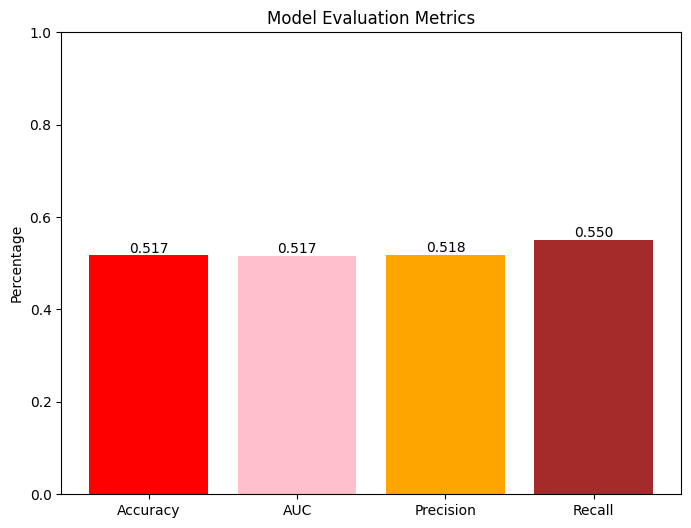

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
Acc.append(accuracy_score(y_test,y_pred))
model_name.append('SVC')
print(classification_report(y_test, y_pred))
evaluate_and_plot(svc, x_test, y_test)


              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1120
           1       0.59      0.65      0.62      1130

    accuracy                           0.60      2250
   macro avg       0.60      0.60      0.60      2250
weighted avg       0.60      0.60      0.60      2250



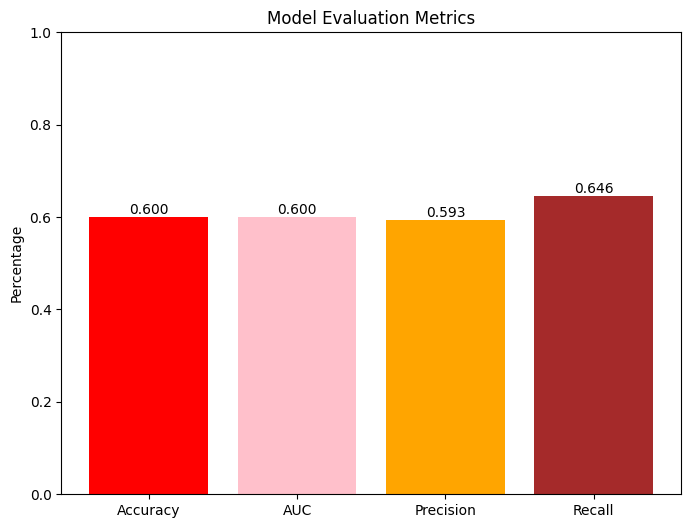

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
Acc.append(accuracy_score(y_test,y_pred))
model_name.append('KNeighborsClassifier')
print(classification_report(y_test, y_pred))
evaluate_and_plot(knn, x_test, y_test)

              precision    recall  f1-score   support

           0       0.76      0.63      0.69      1120
           1       0.69      0.81      0.74      1130

    accuracy                           0.72      2250
   macro avg       0.73      0.72      0.72      2250
weighted avg       0.73      0.72      0.72      2250



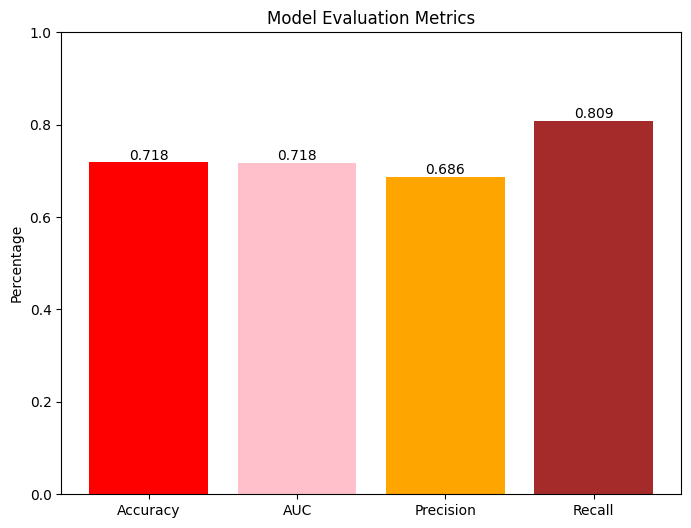

In [ ]:
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)
y_pred=dec.predict(x_test)
Acc.append(accuracy_score(y_test,y_pred))
model_name.append('DecisionTreeClassifier')
print(classification_report(y_test, y_pred))
evaluate_and_plot(dec, x_test, y_test)

In [ ]:
# rfc=RandomForestClassifier(bootstrap = False,n_estimators= 2000)
# rfc.fit(x_train,y_train)
# y_pred=rfc.predict(x_test)
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1120
           1       0.83      0.73      0.78      1130

    accuracy                           0.79      2250
   macro avg       0.79      0.79      0.79      2250
weighted avg       0.79      0.79      0.79      2250



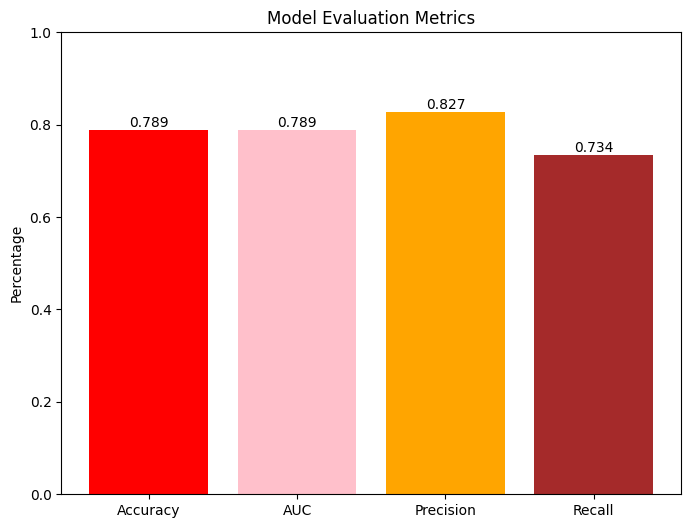

In [ ]:

model=xgb.XGBClassifier(bootstrap = False, colsample_bytree= 0.4, learning_rate= 0.02, max_depth= 12, n_estimators= 600, subsample= 1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
Acc.append(accuracy_score(y_test, y_pred))
model_name.append('XGBoost')
print(classification_report(y_test, y_pred))
evaluate_and_plot(model, x_test, y_test)


              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1120
           1       0.95      0.69      0.80      1130

    accuracy                           0.83      2250
   macro avg       0.85      0.83      0.82      2250
weighted avg       0.85      0.83      0.82      2250



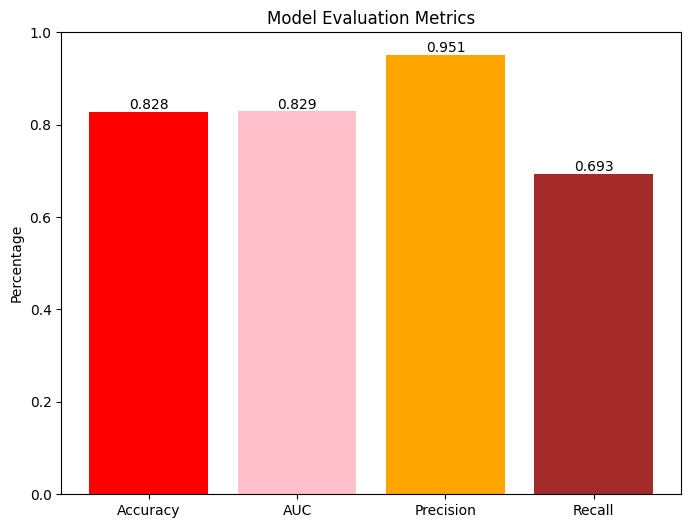

In [ ]:
rfc=RandomForestClassifier(bootstrap = False, max_depth= 100,max_features= 2,min_samples_leaf= 2, min_samples_split= 10, n_estimators= 750)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)


Acc.append(accuracy_score(y_test, y_pred))
model_name.append('RandomForestClassifier')

print(classification_report(y_test, y_pred))
evaluate_and_plot(rfc, x_test, y_test)

In [ ]:

# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'bootstrap': [False],
#     'n_estimators': [500,600],  # Number of boosting rounds
#     'max_depth': [12, 11],  # Maximum depth of each tree
#     'learning_rate': [.1, .02],  # Learning rate
#     'subsample': [1.0,1.2],  # Subsample ratio of the training instances
#     'colsample_bytree': [.4,.3],  # Subsample ratio of columns when constructing each tree
# }

# # Create an XGBoost classifier


# # Create a GridSearchCV object to find the best hyperparameters
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# # Fit the grid search to the training data


# # Get the best model and its hyperparameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# print(f"Best Parameters: {best_params}")

# # Make predictions on the test data using the best model


# # Evaluate the accuracy of the best model
# Acc.append(accuracy_score(y_test, y_pred))
# model_name.append('XGBoost')
# print(classification_report(y_test, y_pred))
# evaluate_and_plot(model, x_test, y_test)

In [ ]:

# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Create the parameter grid based on the results of random search
# param_grid = {
#     'bootstrap': [False],
#     'max_depth': [100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 2],
#     'min_samples_split': [10],
#     'n_estimators': [750, 500, 1000]
# }

# # Create a based model
# rf = RandomForestClassifier()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
#                           cv = 3, n_jobs = -1, verbose = 2)

# # Fit the grid search to the data
# grid_search.fit(x_train, y_train)

# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# print(f"Best Parameters: {best_params}")
# y_pred = best_model.predict(x_test)

# print(classification_report(y_test, y_pred))

# evaluate_and_plot(rf, x_test, y_test)


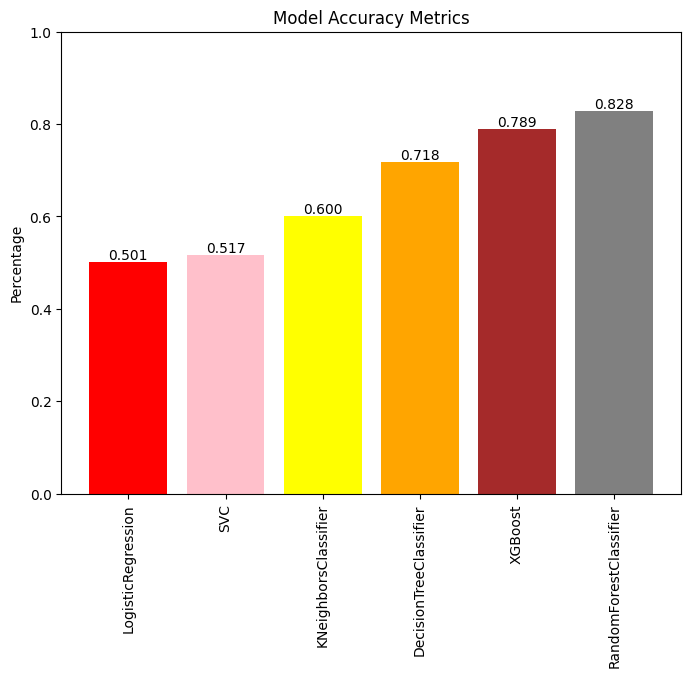

In [ ]:
plt.figure(figsize=(8, 6))
p=plt.bar(model_name,Acc, color=['red','pink','yellow','orange','brown','grey'])
plt.bar_label(p,labels=map(lambda n:"%.3f" % n,Acc),fmt='{.00f}')
plt.title('Model Accuracy Metrics')
plt.xticks(rotation='vertical')
plt.ylabel('Percentage')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for percentages
plt.show()